In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator # 设置刻度间隔
plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False #设置正常显示符号

In [3]:
h = {}
q = ['jinjiang', 'jinniu', 'qingyang', 'chenghua', 'gaoxin7', 'wuhou', 'pidou', 'qingbaijiang', 'xindou', 'shuangliu', 'wenjiang','longquanyi']
for i in q:
    h[i] = pd.read_csv('spider/data/二手房-'+i+'第1次下载.csv')

sum = 0
for qu in q:
    sum += h[qu].shape[0]
sum    

35700

In [4]:
# 删除无效列
def drop_del(d):
    for qu in q:
        for cl in d:
            if cl in h[qu]:
                h[qu].drop([cl], axis=1, inplace=True)
del_col=['标题', '小区', '套内面积', '挂牌时间', '交易权属', '上次交易', '建筑结构', '房屋用途', '房本备件', '用水类型', '用电类型', '燃气价格', '别墅类型']
drop_del(del_col)
h['chenghua'].shape

(3000, 17)

In [5]:
# 重复行处理
for qu in q:
    if h[qu].duplicated:
        h[qu].drop_duplicates(keep='last', inplace=True)
h['qingyang'].shape        

(3000, 17)

In [6]:
# 缺失值处理
def y(x):
    if x != "暂无数据": 
        return x
'''
1.map() 是一个Series的函数,DataFrame结构中没有map()。map()将一个自定义函数应用于Series结构中的每个元素(elements)。
2.apply()和applymap()是DataFrame结构中的函数,Series中没有。
'''
for qu in q:
    h[qu] = h[qu].applymap(y) # apply,applymap: https://blog.csdn.net/Evan_Blog/article/details/82787984
    
for qu in q:
    h[qu].dropna(inplace=True)

sum = 0
for qu in q:
    sum += h[qu].shape[0]
sum    

22765

In [7]:
# 对房屋朝向列进行处理
def split(x):
    return x.split(" ")[0]
# 对面积列除单位
def re(x):
    index = x.find('m') # 第一次出现m的下标
    return x[:index]

for qu in q:
    h[qu]['房屋朝向'] = h[qu]['房屋朝向'].map(split)
    h[qu]['建筑面积'] = h[qu]['建筑面积'].map(re)

h['chenghua']['房屋朝向'].head()
h['chenghua']['建筑面积'].head()

1    144.42
2    271.09
3    113.41
4     83.18
6     70.29
Name: 建筑面积, dtype: object

In [8]:
# 类型转换
# https://blog.csdn.net/qq_28388339/article/details/109769577
for qu in q:
    h[qu] = h[qu].astype({'总价格':'float','建筑面积':'float','单价':'float'})

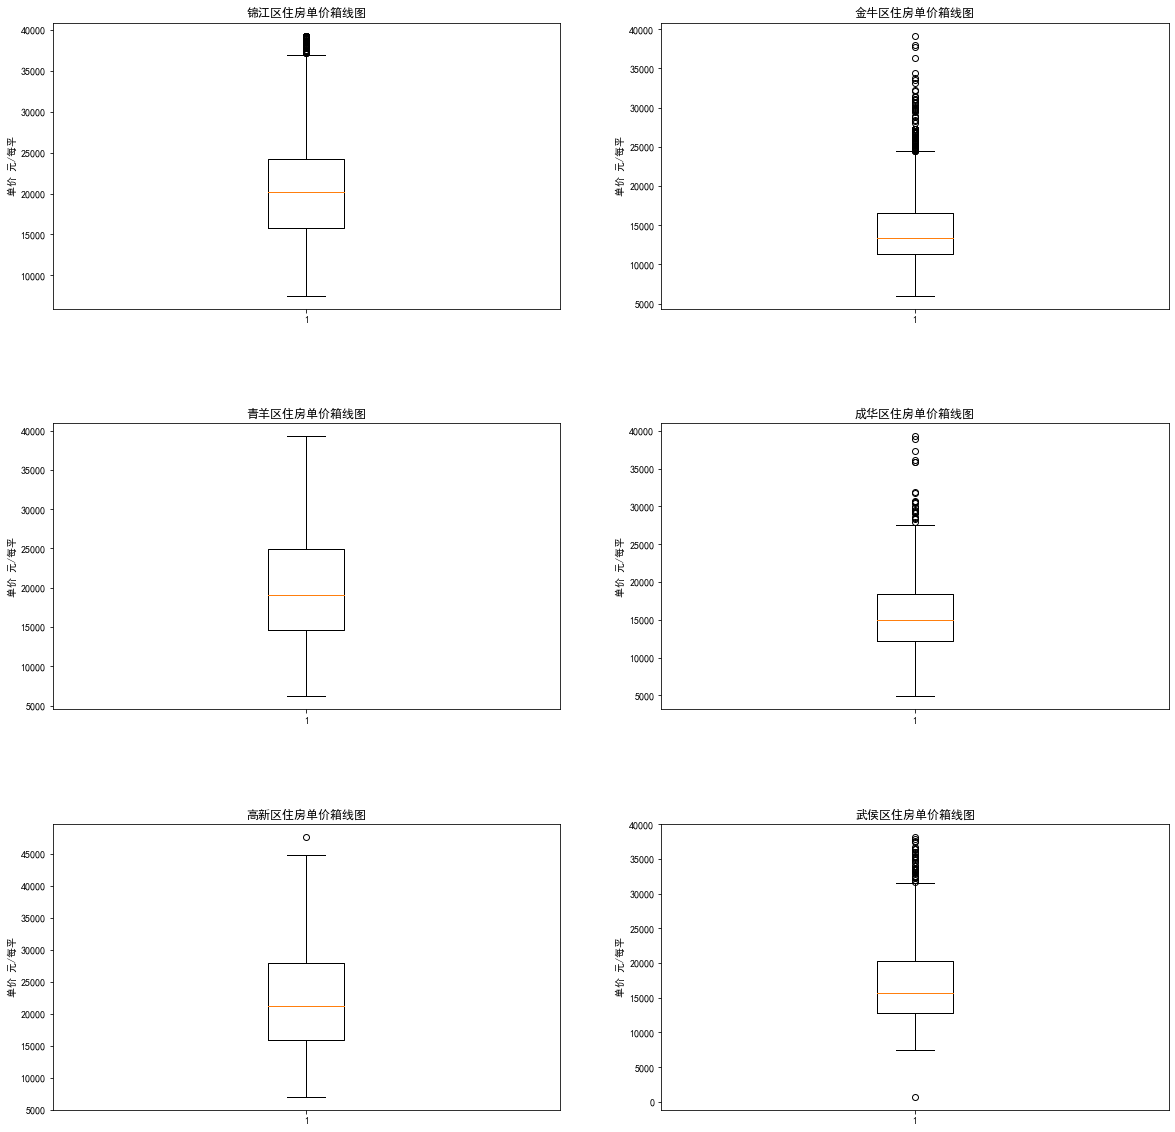

In [9]:
# 数据分析
# print(h['jinjiang']['单价'].values.tolist())
figure = plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.4)
cnt = 1
for i in range(0, 6):
    qu = q[i]
    ax = figure.add_subplot(3, 2, cnt)
    y_major_locator=MultipleLocator(5000)
    #把y轴的刻度间隔设置为10，并存在变量里
    ax=plt.gca()
    #ax为两条坐标轴的实例
    ax.yaxis.set_major_locator(y_major_locator)
    #把y轴的主刻度设置为10的倍数
    plt.ylabel('单价 元/每平')
    plt.title(h[qu]['房屋所属市辖区'][1]+'区住房单价箱线图')
    plt.boxplot((h[qu]['单价'].values.tolist()))
    cnt += 1 

### 从上图我们可以看出，在成都六城区中，武侯，成华和金牛区的房价是比较低的，高新区的房价最高。六城区整体房价在1.3w-2.2w左右。

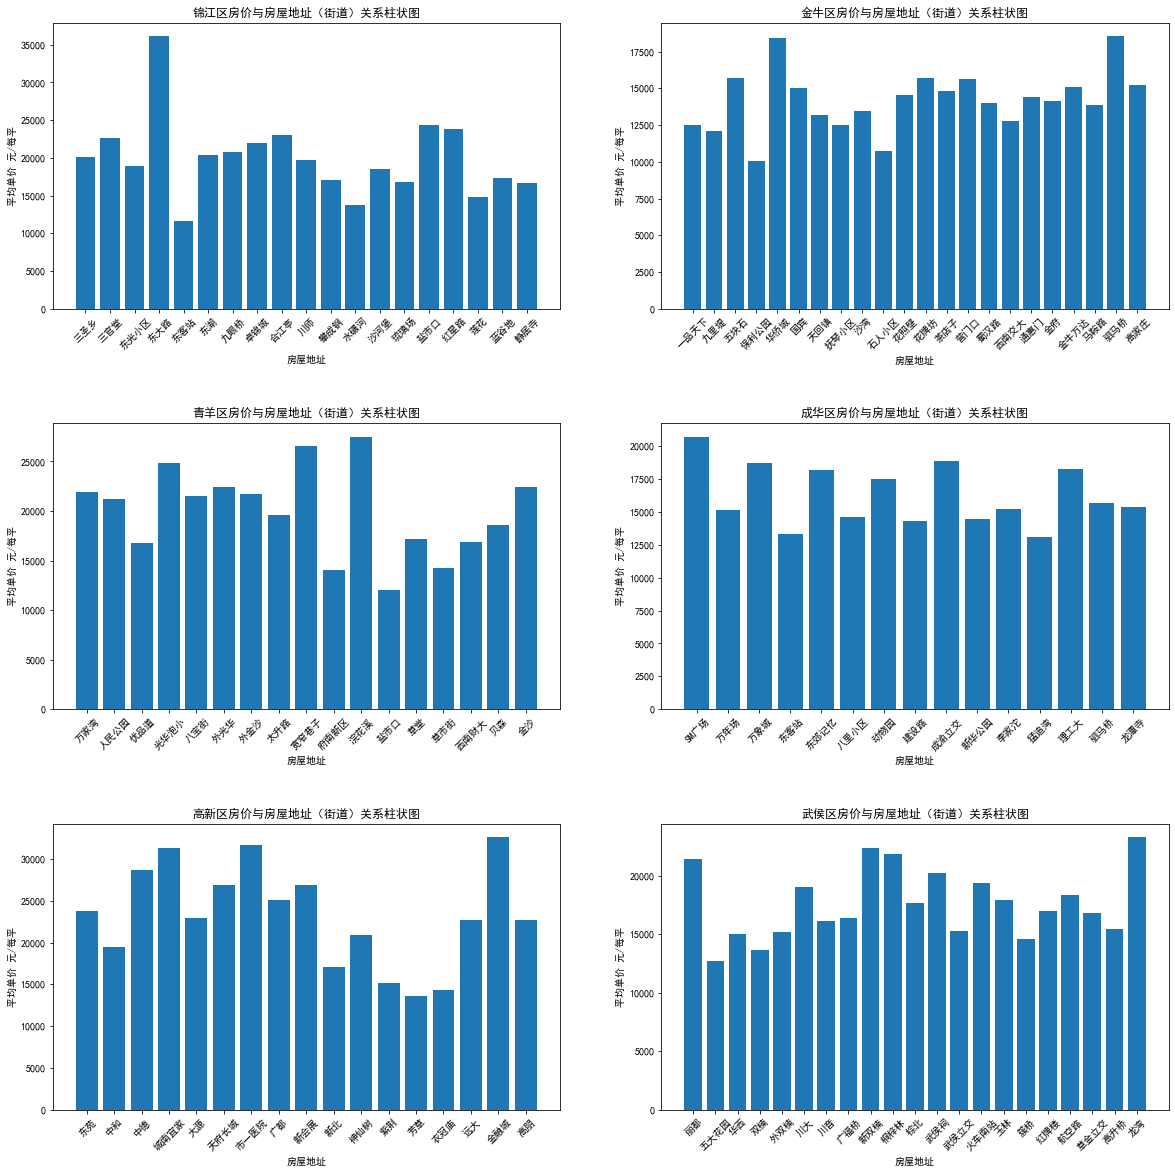

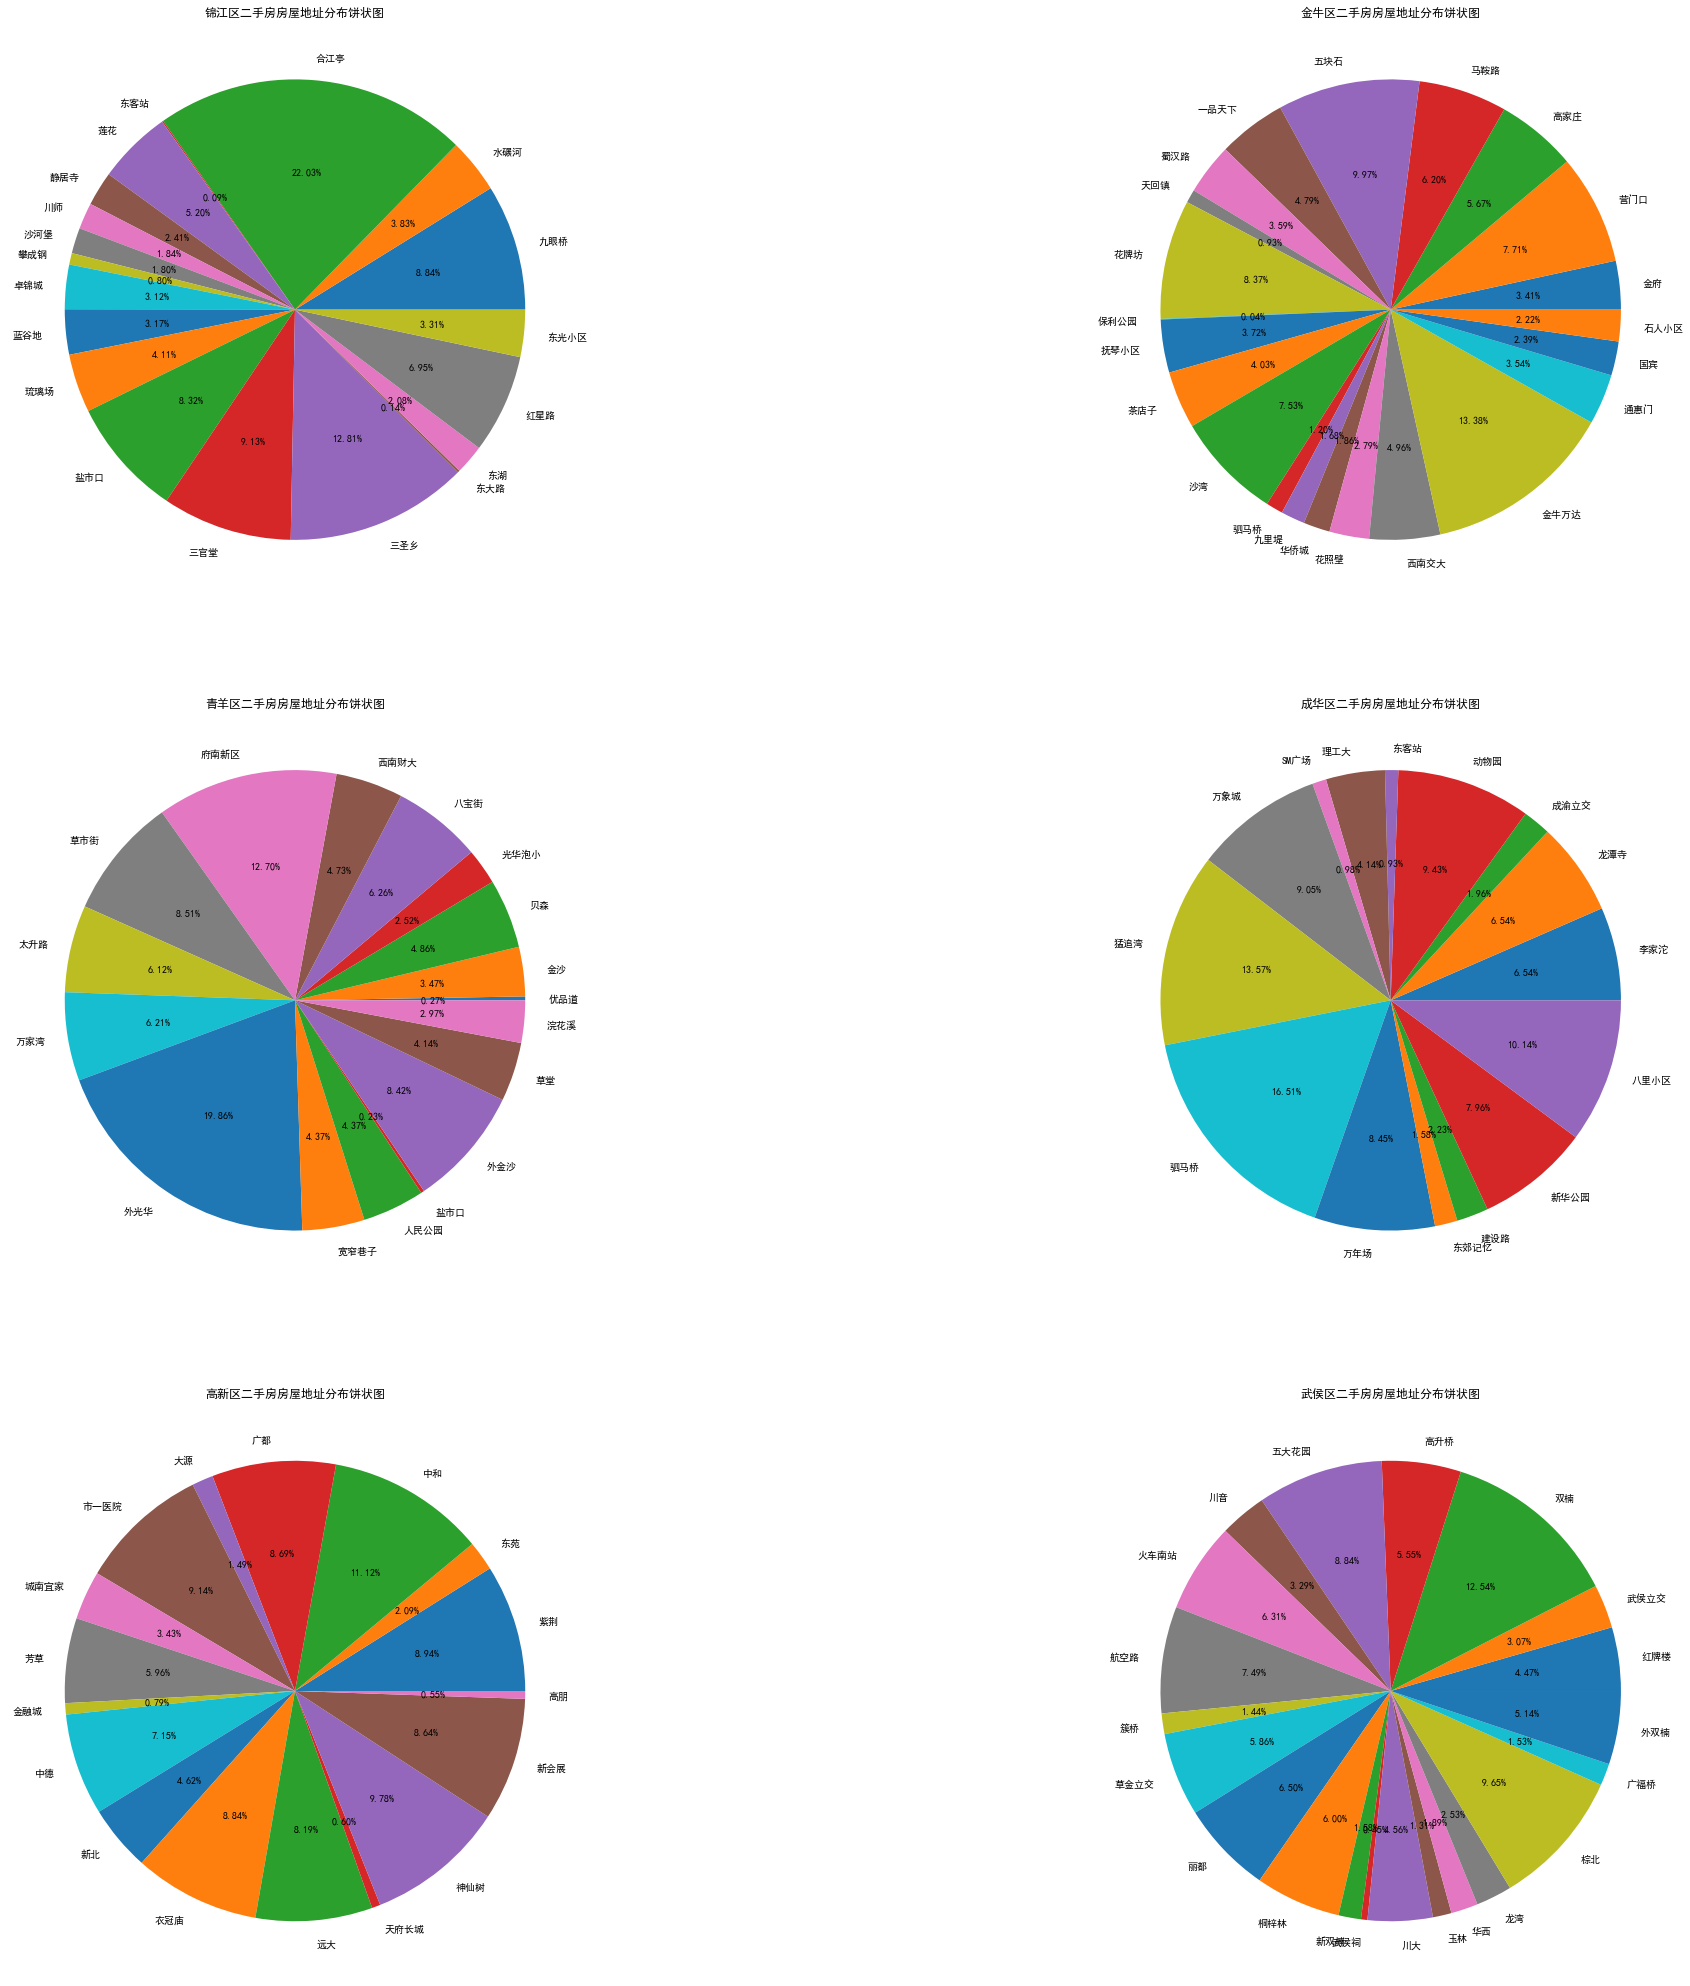

In [10]:
# 同一区房屋地址的影响 柱状图+饼图
figure = plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.4)
cnt=1
for i in range(0, 6):
    qu = q[i]
    ax = figure.add_subplot(3, 2, cnt)
    plt.title(h[qu]['房屋所属市辖区'][1]+'区房价与房屋地址（街道）关系柱状图')
    plt.xlabel('房屋地址')
    plt.ylabel('平均单价 元/每平')
    plt.xticks(rotation=45)
#     print(addr_u)
    gp = h[qu].groupby('房屋地址（街道）')
    gp_agg = gp['单价'].agg('mean')
#     print(type(gp_agg.index))
#     print(gp['单价'].agg('mean').values.tolist())
    # https://blog.csdn.net/brucewong0516/article/details/79196902
    plt.bar(x=gp_agg.index, height=gp_agg.values.tolist())
    cnt+=1

cnt=1
figure = plt.figure(figsize=(36,36))
for i in range(0, 6):
    qu = q[i]
    ax = figure.add_subplot(3, 2, cnt)
    plt.title(h[qu]['房屋所属市辖区'][1]+'区二手房房屋地址分布饼状图')
    addr = h[qu]['房屋地址（街道）'].values.tolist()
    addr_u = list(set(addr))
    num = [addr.count(it) for it in addr_u]
    # https://blog.csdn.net/chenpe32cp/article/details/87865625
    plt.pie(num, labels=addr_u, autopct="%.2f%%")
    cnt+=1

### 从上图我们可以看出六城区的哪些地段二手房房价较高，购买前可参考。同时我们也可以从饼图中得到六城区二手房在各个地段的分布情况的多少，在购房前可进行参考

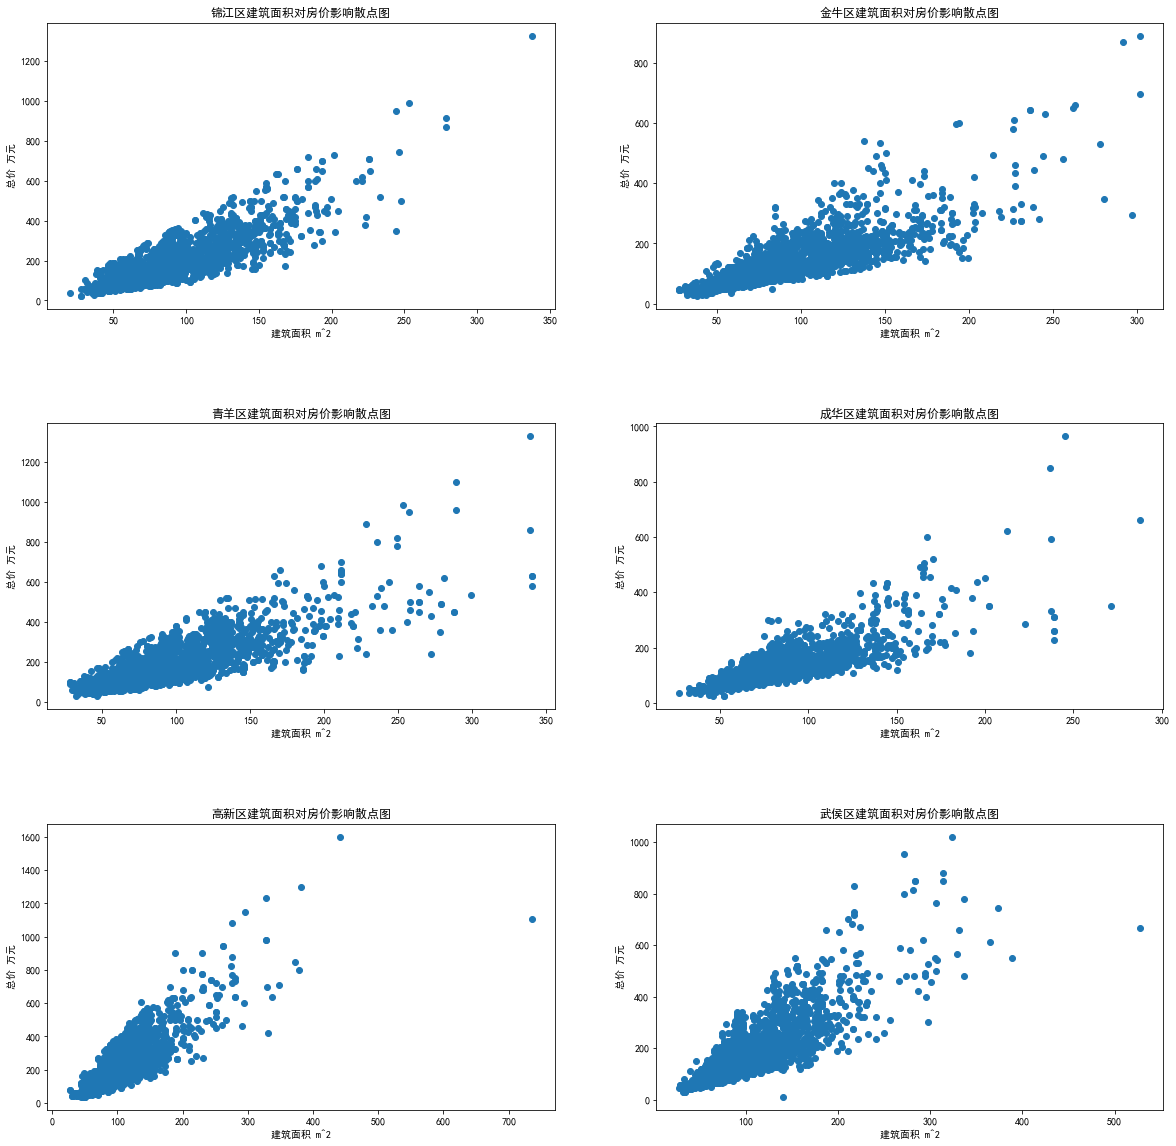

In [11]:
# 同一区面积与价格的关系 散点图
figure = plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.4)
cnt=1
for i in range(0, 6):
    qu = q[i]
    ax = figure.add_subplot(3, 2, cnt)
    plt.title(h[qu]['房屋所属市辖区'][1]+'区建筑面积对房价影响散点图')
    plt.xlabel('建筑面积 m^2')
    plt.ylabel('总价 万元')
    plt.scatter(h[qu]['建筑面积'], h[qu]['总价格'])
    cnt+=1

### 从上图我们可以看出我们想要在买一套100-200m^2的二手房，在高新区大概需要250-500w的预算，而成华区只需要100-300w左右（最密集的地方）

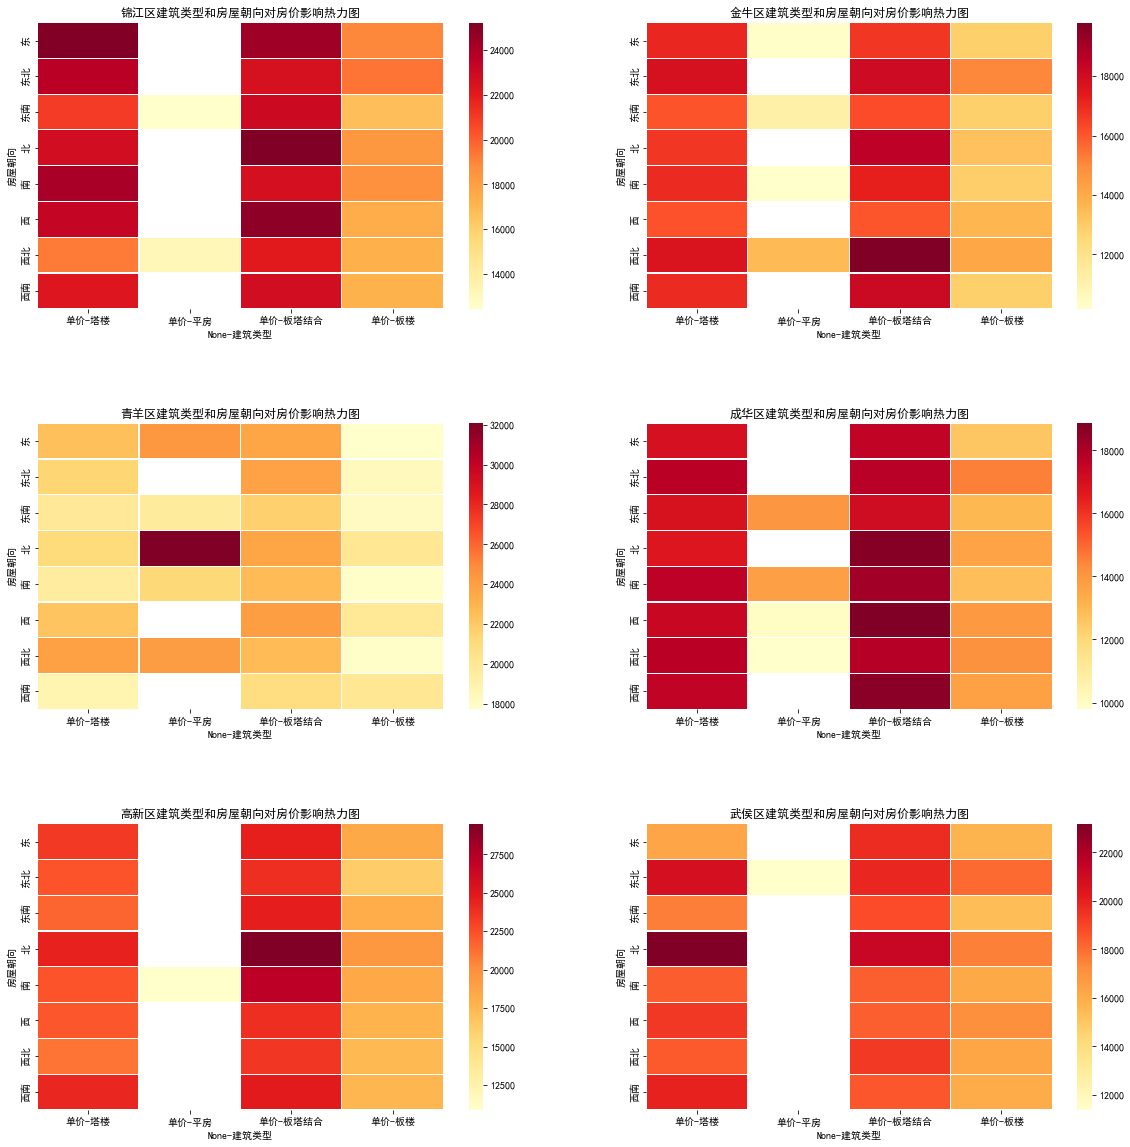

In [12]:
# 热图是对一个二维的表的可视化，表格的值就是颜色的深浅
# 建筑结构和建筑类型为键，单价为value，构建透视表，画热图
figure = plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.4)
cnt = 1
for i in range(0, 6):
    qu = q[i]
    ax = figure.add_subplot(3, 2, cnt)
    plt.title(h[qu]['房屋所属市辖区'][1]+'区建筑类型和房屋朝向对房价影响热力图')
    pivot_table = pd.pivot_table(h[qu], index=['房屋朝向'], columns=['建筑类型'], values=['单价'], aggfunc='mean')
    x = sns.heatmap(pivot_table, cmap=plt.cm.YlOrRd, linewidths=.1)
    cnt += 1

### 从图中我们可以很明显的发现塔楼和板塔结合的建筑类型的价格相较平房和板楼都要高，同时平房的价格最低。同时我们会发现，房屋朝向对于房价的影响似乎并不显著

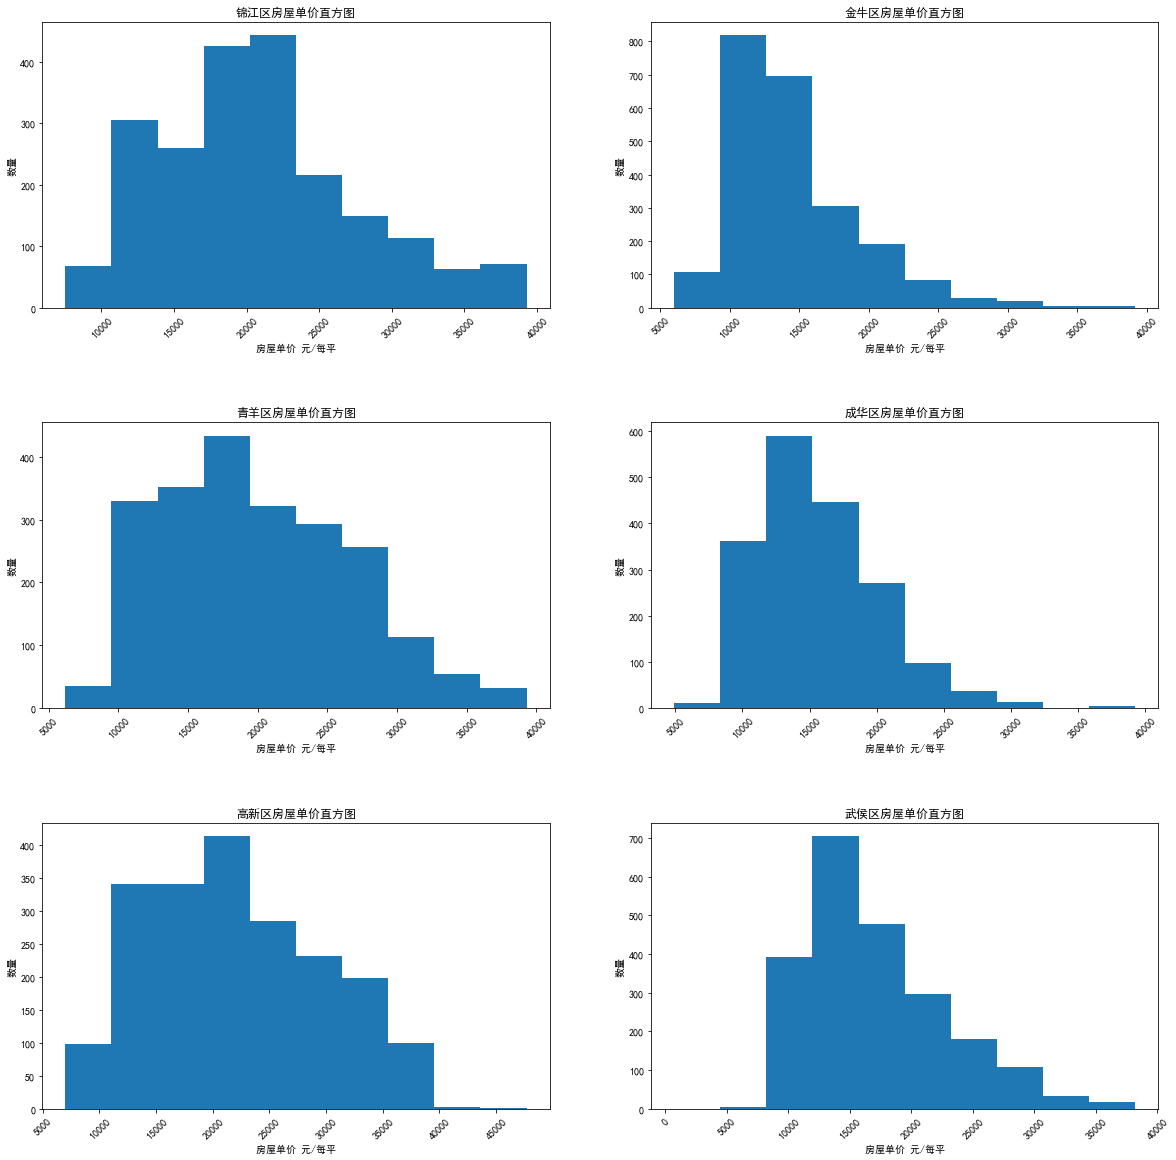

In [13]:
# 单价 直方图
figure = plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.4)
cnt=1
for i in range(0, 6):
    qu = q[i]
    ax = figure.add_subplot(3, 2, cnt)
    plt.title(h[qu]['房屋所属市辖区'][1]+'区房屋单价直方图')
    plt.xlabel('房屋单价 元/每平')
    plt.ylabel('数量')
    plt.xticks(rotation=45)
    plt.hist((h[qu]['单价'].values.tolist()))
    cnt+=1

### 根据上图我们可以得到，六城区房屋单价的众数，在购房前可供参考。我们可以看到高新区的房屋单价大多在2-2.5w左右，成华区为1.2-1.5w左右

In [14]:
# 模型 多元线性回归
# https://blog.csdn.net/weixin_40014576/article/details/79918819
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
# 合并数据集 https://blog.csdn.net/haha_point/article/details/86512316
data_all=h[q[0]]
for i in range(1, len(q)):
    data_all = pd.concat([data_all, h[q[i]]], ignore_index=True)
data_all

,Unnamed: 0,总价格,单价,房屋所属市辖区,房屋地址（街道）,房屋户型,所在楼层,建筑面积,户型结构,建筑类型,房屋朝向,装修情况,梯户比例,配备电梯,房屋年限,产权所属,抵押信息
0,0,195.0,21827.0,锦江,九眼桥,2室1厅1厨1卫,高楼层 (共26层),89.34,平层,板塔结合,东南,精装,两梯四户,有,满五年,非共有,\n 无抵押\n ...
1,1,93.7,16811.0,锦江,合江亭,3室1厅1厨1卫,低楼层 (共7层),55.74,平层,板塔结合,南,简装,一梯五户,无,满两年,非共有,\n 无抵押\n ...
2,2,140.0,17812.0,锦江,合江亭,3室1厅1厨1卫,中楼层 (共7层),78.60,平层,板楼,南,简装,一梯两户,无,满五年,非共有,\n 无抵押\n ...
3,3,99.0,18209.0,锦江,合江亭,2室1厅1厨1卫,低楼层 (共7层),54.37,平层,塔楼,东南,简装,一梯四户,无,满五年,非共有,\n 无抵押\n ...
4,4,105.0,14280.0,锦江,琉璃场,2室1厅1厨1卫,高楼层 (共6层),73.53,平层,板楼,东南,精装,一梯三户,无,满五年,非共有,\n 无抵押\n ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22760,2988,110.0,13223.0,龙泉驿,洪河,2室1厅1厨1卫,低楼层 (共6层),83.19,平层,板楼,南,其他,一梯两户,无,满五年,共有,\n 无抵押\n ...
22761,2994,103.0,12548.0,龙泉驿,龙泉驿城区,2室1厅1厨1卫,低楼层 (共26层),82.09,平层,塔楼,东北,简装,两梯七户,有,满五年,非共有,\n 无抵押\n ...
22762,2996,135.0,13638.0,龙泉驿,龙泉驿城区,2室2厅1厨1卫,高楼层 (共11层),98.99,平层,板塔结合,东南,精装,一梯两户,有,满五年,共有,\n 无抵押\n ...
22763,2998,65.0,14186.0,龙泉驿,龙泉驿城区,1室1厅1厨1卫,中楼层 (共24层),45.82,平层,塔楼,东北,简装,四梯十七户,有,满两年,非共有,\n 有抵押 19万元 中国银...


In [16]:
# 删除无效列
# print(data_all.columns)
def drop_col(dl):
    for it in dl:
        if it in data_all:
            data_all.drop([it], axis=1, inplace=True)
    
del_col = ['抵押信息', '单价', 'Unnamed: 0', '房屋朝向', '梯户比例', '房屋年限', '房屋户型','房屋地址（街道）']
drop_col(del_col)
data_all

,总价格,房屋所属市辖区,所在楼层,建筑面积,户型结构,建筑类型,装修情况,配备电梯,产权所属
0,195.0,锦江,高楼层 (共26层),89.34,平层,板塔结合,精装,有,非共有
1,93.7,锦江,低楼层 (共7层),55.74,平层,板塔结合,简装,无,非共有
2,140.0,锦江,中楼层 (共7层),78.60,平层,板楼,简装,无,非共有
3,99.0,锦江,低楼层 (共7层),54.37,平层,塔楼,简装,无,非共有
4,105.0,锦江,高楼层 (共6层),73.53,平层,板楼,精装,无,非共有
...,...,...,...,...,...,...,...,...,...
22760,110.0,龙泉驿,低楼层 (共6层),83.19,平层,板楼,其他,无,共有
22761,103.0,龙泉驿,低楼层 (共26层),82.09,平层,塔楼,简装,有,非共有
22762,135.0,龙泉驿,高楼层 (共11层),98.99,平层,板塔结合,精装,有,共有
22763,65.0,龙泉驿,中楼层 (共24层),45.82,平层,塔楼,简装,有,非共有


In [17]:
# 房屋所属市辖区数值转化
qtn = {'锦江':11, '金牛':8, '成华':7, '高新':12, '武侯':9, '青羊':10, '双流':4, '温江':5, '龙泉驿':6, '新都':3,
       '郫都':2, '青白江':1, '其他':6}
data_all['房屋所属市辖区'] = data_all['房屋所属市辖区'].map(lambda x:qtn[x])
data_all

,总价格,房屋所属市辖区,所在楼层,建筑面积,户型结构,建筑类型,装修情况,配备电梯,产权所属
0,195.0,11,高楼层 (共26层),89.34,平层,板塔结合,精装,有,非共有
1,93.7,11,低楼层 (共7层),55.74,平层,板塔结合,简装,无,非共有
2,140.0,11,中楼层 (共7层),78.60,平层,板楼,简装,无,非共有
3,99.0,11,低楼层 (共7层),54.37,平层,塔楼,简装,无,非共有
4,105.0,11,高楼层 (共6层),73.53,平层,板楼,精装,无,非共有
...,...,...,...,...,...,...,...,...,...
22760,110.0,6,低楼层 (共6层),83.19,平层,板楼,其他,无,共有
22761,103.0,6,低楼层 (共26层),82.09,平层,塔楼,简装,有,非共有
22762,135.0,6,高楼层 (共11层),98.99,平层,板塔结合,精装,有,共有
22763,65.0,6,中楼层 (共24层),45.82,平层,塔楼,简装,有,非共有


In [18]:
def floor(x):
    return x[6:re.search(r'共(.*?)层', x).span()[1]-1]

data_all['所在楼层'] = data_all['所在楼层'].map(floor)
data_all

,总价格,房屋所属市辖区,所在楼层,建筑面积,户型结构,建筑类型,装修情况,配备电梯,产权所属
0,195.0,11,26,89.34,平层,板塔结合,精装,有,非共有
1,93.7,11,7,55.74,平层,板塔结合,简装,无,非共有
2,140.0,11,7,78.60,平层,板楼,简装,无,非共有
3,99.0,11,7,54.37,平层,塔楼,简装,无,非共有
4,105.0,11,6,73.53,平层,板楼,精装,无,非共有
...,...,...,...,...,...,...,...,...,...
22760,110.0,6,6,83.19,平层,板楼,其他,无,共有
22761,103.0,6,26,82.09,平层,塔楼,简装,有,非共有
22762,135.0,6,11,98.99,平层,板塔结合,精装,有,共有
22763,65.0,6,24,45.82,平层,塔楼,简装,有,非共有


In [19]:
def check(x):
    if x == "平层":
        return 1
    else:
        return 2
data_all['户型结构'] = data_all['户型结构'].map(check)
data_all

,总价格,房屋所属市辖区,所在楼层,建筑面积,户型结构,建筑类型,装修情况,配备电梯,产权所属
0,195.0,11,26,89.34,1,板塔结合,精装,有,非共有
1,93.7,11,7,55.74,1,板塔结合,简装,无,非共有
2,140.0,11,7,78.60,1,板楼,简装,无,非共有
3,99.0,11,7,54.37,1,塔楼,简装,无,非共有
4,105.0,11,6,73.53,1,板楼,精装,无,非共有
...,...,...,...,...,...,...,...,...,...
22760,110.0,6,6,83.19,1,板楼,其他,无,共有
22761,103.0,6,26,82.09,1,塔楼,简装,有,非共有
22762,135.0,6,11,98.99,1,板塔结合,精装,有,共有
22763,65.0,6,24,45.82,1,塔楼,简装,有,非共有


In [20]:
jtn = {'板塔结合':4, '板楼':2, '塔楼':3, '平房':1}
data_all['建筑类型'] = data_all['建筑类型'].map(lambda x:jtn[x])
data_all

,总价格,房屋所属市辖区,所在楼层,建筑面积,户型结构,建筑类型,装修情况,配备电梯,产权所属
0,195.0,11,26,89.34,1,4,精装,有,非共有
1,93.7,11,7,55.74,1,4,简装,无,非共有
2,140.0,11,7,78.60,1,2,简装,无,非共有
3,99.0,11,7,54.37,1,3,简装,无,非共有
4,105.0,11,6,73.53,1,2,精装,无,非共有
...,...,...,...,...,...,...,...,...,...
22760,110.0,6,6,83.19,1,2,其他,无,共有
22761,103.0,6,26,82.09,1,3,简装,有,非共有
22762,135.0,6,11,98.99,1,4,精装,有,共有
22763,65.0,6,24,45.82,1,3,简装,有,非共有


In [21]:
def dec(x):
    if x == "精装":
        return 3
    elif x == "简装":
        return 2
    elif x == "毛坯":
        return 1
    else:
        return 0
data_all['装修情况'] = data_all['装修情况'].map(dec)
data_all

,总价格,房屋所属市辖区,所在楼层,建筑面积,户型结构,建筑类型,装修情况,配备电梯,产权所属
0,195.0,11,26,89.34,1,4,3,有,非共有
1,93.7,11,7,55.74,1,4,2,无,非共有
2,140.0,11,7,78.60,1,2,2,无,非共有
3,99.0,11,7,54.37,1,3,2,无,非共有
4,105.0,11,6,73.53,1,2,3,无,非共有
...,...,...,...,...,...,...,...,...,...
22760,110.0,6,6,83.19,1,2,0,无,共有
22761,103.0,6,26,82.09,1,3,2,有,非共有
22762,135.0,6,11,98.99,1,4,3,有,共有
22763,65.0,6,24,45.82,1,3,2,有,非共有


In [22]:
def ele(x):
    if x=="有":
        return 2
    else:
        return 1
data_all['配备电梯'] = data_all['配备电梯'].map(ele)
data_all

,总价格,房屋所属市辖区,所在楼层,建筑面积,户型结构,建筑类型,装修情况,配备电梯,产权所属
0,195.0,11,26,89.34,1,4,3,2,非共有
1,93.7,11,7,55.74,1,4,2,1,非共有
2,140.0,11,7,78.60,1,2,2,1,非共有
3,99.0,11,7,54.37,1,3,2,1,非共有
4,105.0,11,6,73.53,1,2,3,1,非共有
...,...,...,...,...,...,...,...,...,...
22760,110.0,6,6,83.19,1,2,0,1,共有
22761,103.0,6,26,82.09,1,3,2,2,非共有
22762,135.0,6,11,98.99,1,4,3,2,共有
22763,65.0,6,24,45.82,1,3,2,2,非共有


In [23]:
def cpr(x):
    if x[0]=="非":
        return 2
    else:
        return 1
data_all['产权所属'] = data_all['产权所属'].map(cpr)
data_all

,总价格,房屋所属市辖区,所在楼层,建筑面积,户型结构,建筑类型,装修情况,配备电梯,产权所属
0,195.0,11,26,89.34,1,4,3,2,2
1,93.7,11,7,55.74,1,4,2,1,2
2,140.0,11,7,78.60,1,2,2,1,2
3,99.0,11,7,54.37,1,3,2,1,2
4,105.0,11,6,73.53,1,2,3,1,2
...,...,...,...,...,...,...,...,...,...
22760,110.0,6,6,83.19,1,2,0,1,1
22761,103.0,6,26,82.09,1,3,2,2,2
22762,135.0,6,11,98.99,1,4,3,2,1
22763,65.0,6,24,45.82,1,3,2,2,2


In [24]:
# 训练集与测试集的划分
# 机器学习模型要求输入为数值变量，特征必须是大小为(n_samples, n_features)的数值矩阵
X_train,X_test,Y_train,Y_test = train_test_split(data_all.iloc[:, 1:], data_all.iloc[:, 0], 
                                                 train_size=.8, random_state=42)

In [25]:
# 模型训练
model = LinearRegression()
model.fit(X_train,Y_train)
a  = model.intercept_#截距
b = model.coef_#回归系数
print(a, b)

-219.35404262358006 [13.69287917  1.19951206  1.84922108 -4.51870949  2.77248728  4.36220439
 36.267062    0.4694642 ]


In [26]:
#R方检测评估
#决定系数r平方
#对于评估模型的精确度
#y误差平方和 = Σ(y实际值 - y预测值)^2
#y的总波动 = Σ(y实际值 - y平均值)^2
#有多少百分比的y波动没有被回归拟合线所描述 = SSE/总波动
#有多少百分比的y波动被回归线描述 = 1 - SSE/总波动 = 决定系数R平方
#对于决定系数R平方来说
#1）回归线拟合程度：有多少百分比的y波动刻印有回归线来描述(x的波动变化)
#2）值大小：R平方越高，回归模型越精确(取值范围0~1)，1无误差，0无法完成拟合
score = model.score(X_test,Y_test)
print(score)

0.7016419427021998


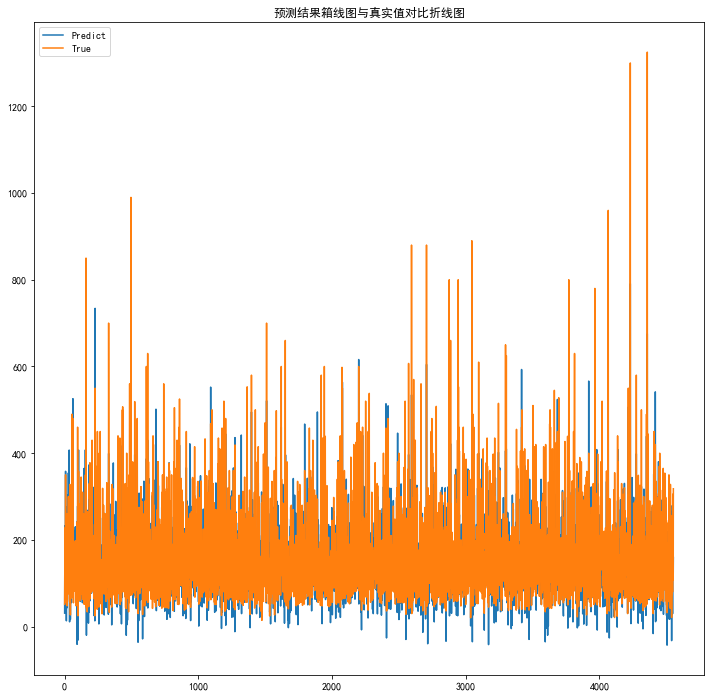

In [34]:
# 折线图可视化对比评估
Y_pred = model.predict(X_test)
figure = plt.figure(figsize=(12,12))
plt.title("预测结果箱线图与真实值对比折线图")
plt.plot(range(1, len(Y_pred)+1), Y_pred, label="Predict")
plt.plot(range(1, len(Y_pred)+1), Y_test, label="True")
plt.legend()
# plt.boxplot((Y_pred, Y_test), labels=['predict', 'true'])

In [119]:
s = input('''您想买一个什么样的房子？
请用逗号隔开依次阐述，
房屋所属市辖区（锦江，青羊，成华，武侯，高新，金牛，双流，龙泉驿，温江，新都，郫都，青白江，其他）, 
所在楼层（输入为一个整数）, 建筑面积（输入为一个数）, 户型结构（平层，跃层）, 建筑类型（塔楼，板楼，平房，板塔结合）, 
装修情况（精装，简装，毛胚，其他）, 配备电梯（有，无）, 产权所属（共有，非公有）''')

您想买一个什么样的房子？
请用逗号隔开依次阐述，
房屋所属市辖区（锦江，青羊，成华，武侯，高新，金牛，双流，龙泉驿，温江，新都，郫都，青白江，其他）, 
所在楼层（输入为一个整数）, 建筑面积（输入为一个数）, 户型结构（平层，跃层）, 建筑类型（塔楼，板楼，平房，板塔结合）, 
装修情况（精装，简装，毛胚，其他）, 配备电梯（有，无）, 产权所属（共有，非公有）锦江，8，140，跃层，板塔结合，精装，有，非公有


In [120]:
print(s)
f = s.split("，")
print(f)

# 输入审核
while True:
    if f[0] in ['锦江','青羊','成华','武侯','高新','金牛','双流','龙泉驿','温江','新都','郫都','青白江','其他']:
        f[0] = qtn[f[0]]
        break
    else:
        f[0] = input("请重新输入所需房屋所属市辖区（锦江，青羊，成华，武侯，高新，金牛，双流，龙泉驿，温江，新都，郫都，青白江，其他）")
        
while True:
    fg = 0
    for c in f[1]:
        if c > '9' or c < '0':
            f[1] = input("格式错误，请重新输入所需楼层（输入为一个整数）")
            fg = 1
            break
    if fg == 0: 
        f[1] = int(f[1])
        break
    
while True:
    fg = 0
    for c in f[2]:
        if c != '.':
            if c > '9' or c < '0':
                f[2] = input("格式错误，请重新输入所需建筑面积（输入为一个数字）")
                fg = 1
                break
    if fg == 0: 
        f[2] = float(f[2])
        break

while True:
    if f[3] in ['平层', '跃层']:
        f[3] = check(f[3])
        break
    else:
        f[3] = input("请重新输入所需户型结构（平层，跃层）")
        
while True:
    if f[4] in ['塔楼', '板楼', '平房', '板塔结合']:
        f[4] = jtn[f[4]]
        break
    else:
        f[4] = input("请重新输入所需的建筑结构（塔楼，板楼，平房，板塔结合）")
        
while True:
    if f[5] in ['精装', '简装', '毛坯', '其他']:
        f[5] = dec(f[5])
        break
    else:
        f[5] = input("请重新输入所需房屋的装修情况（精装，简装，毛坯，其他）")
        
while True:
    if f[6] in ['有', '无']:
        f[6] = ele(f[6])
        break
    else:
        f[6] = input("请重新输入所需房屋是否需要电梯（有，无）")
        
while True:
    if f[7] in ['非公有', '共有']:
        f[7] = cpr(f[7])
        break
    else:
        f[7] = input("请重新输入您对产权所属的要求（非公有，共有）")

res = 0
for i in range(0, 8):
    res += b[i] * f[i]
res += a
print("按照您的购房要求，对您的预算进行估计，大概需要"+str(res)+"万元")

锦江，8，140，跃层，板塔结合，精装，有，非公有
['锦江', '8', '140', '跃层', '板塔结合', '精装', '有', '非公有']
按照您的购房要求，对您的预算进行估计，大概需要288.3668712401344万元
